In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [2]:
data = pd.read_excel('DataSet.xls')

### Simple Regression

In [3]:
X = data.Age
Y = data.Expenditures

## Question 1

### Coefficients

In [4]:
b = (X*Y - X*Y.mean()).sum()/(X*X - X*X.mean()).sum()
a = Y.mean() - b*X.mean()
a, b

(114.24110795493151, -0.3335960966062749)

### Standard Error

In [5]:
error            = Y - (a + b*X)
Sum_Square_Error = ( error**2).sum()
n = data.shape[0]
stdev = math.sqrt(1/(n-2)*Sum_Square_Error)
# logging.info(f'standard error is {round(standard_error, 3)}')
print(f'standard error is {round(stdev, 3)}')

standard error is 5.073


In [6]:
C = (X-X.mean())/((X-X.mean())**2).sum()
beta = b - (C*error).sum()

print(f'beta is {beta}')

beta is -0.33359609660627315


In [7]:

s_b = stdev ** 2 / ((X-X.mean())**2).sum()
print(f's_b is {s_b}')

s_b is 0.00909528102577286


In [8]:
t_beta = (b-beta)/s_b
print(f't distribution of beta is {t_beta}')

t distribution of beta is -1.892020360110606e-13


### Answer 1

In [9]:
print('Answer of question 1:')
print( f'Value of intercept a is {round(a, 4)}')
print( f'Value of coefficient b is {round(b, 4)}')
print( f'Standard Error is {round(stdev, 4)}')
print( f't distribution of beta is {t_beta}')

Answer of question 1:
Value of intercept a is 114.2411
Value of coefficient b is -0.3336
Standard Error is 5.0733
t distribution of beta is -1.892020360110606e-13


### Summarize solution 1 into function for following questions

In [10]:
def calc_q1(df_data, group):
    X = df_data.Age
    Y = df_data.Expenditures
    
    b = (X*Y - X*Y.mean()).sum()/(X*X - X*X.mean()).sum()
    a = Y.mean() - b*X.mean()
    
    error            = Y - (a + b*X)
    Sum_Square_Error = ( error**2).sum()
    n = df_data.shape[0]
    stdev = math.sqrt(1/(n-2)*Sum_Square_Error)
    
    C = (X-X.mean())/((X-X.mean())**2).sum()
    beta = b - (C*error).sum()
    
    s_b = stdev ** 2 / ((X-X.mean())**2).sum()
    
    t_beta = (b-beta)/s_b
    
    print( f'Present result for Age {group}')
    print( f'Value of intercept a is {round(a, 4)}')
    print( f'Value of coefficient b is {round(b, 4)}')
    print( f'Standard Error is {round(stdev, 4)}')
    print( f't distribution of beta is {t_beta}')
    
    return a, b, stdev, t_beta

## Question 2

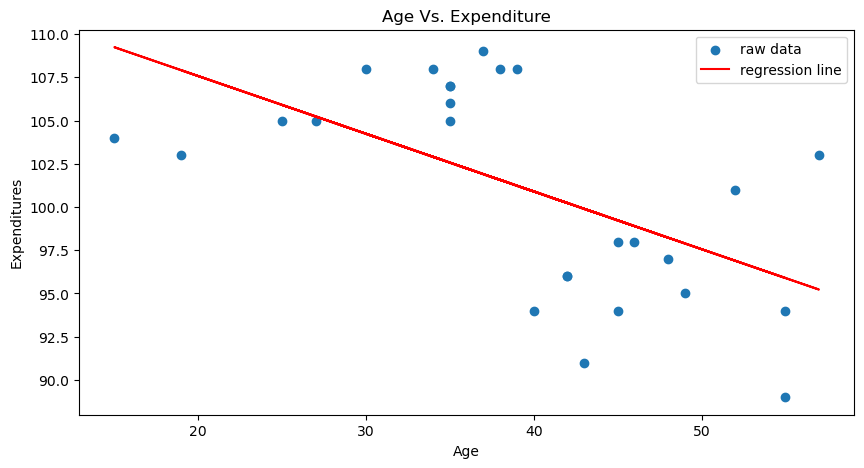

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, label='raw data')
plt.plot(X, a+b*X, color='r', linestyle='solid', label='regression line')
plt.xlabel('Age')
plt.ylabel('Expenditures')
plt.title('Age Vs. Expenditure')
plt.legend()
plt.show()

### Answer 2

1. Based on regresion line, expense decreases as age increases
2. Based on raw data points, these data can be separated into two groups and each group can be modeled separately.

### Question 3

In [12]:
# Split group based on Age
df_g1 = data[data.Age >= 40]
df_g2 = data[data.Age < 40]

### Answer 3

In [13]:
a1, b1, stdev1, t_beta1 = calc_q1(df_g1, group='>= 40')


Present result for Age >= 40
Value of intercept a is 88.8719
Value of coefficient b is 0.1465
Standard Error is 3.8329
t distribution of beta is -2.6501316223622335e-13


In [14]:
a2, b2, stdev2, t_beta2 = calc_q1(df_g2, group='< 40')

Present result for Age < 40
Value of intercept a is 100.2323
Value of coefficient b is 0.198
Standard Error is 1.1531
t distribution of beta is 9.158349682221194e-13


### Question 4 and Answer 4

1. in a) we can see the Age and Expenditure are negative related. However, in c), for each group, Age and Expenditure are possitive related. It is because there is an expenditure drop at Age 40. 
2. Before and after Age 40, each data group follows a upward trend. But between the groups, the expenditure is downward.
3. Based on standard error, models in c) have smaller standard error and can model the dataset better than a).